In [23]:
!pip install descartes

In [1]:
import sys
import os

In [2]:
import sys
import os
os.chdir('C:\\Users\\carli\\Dropbox\\Carlos Arturo Ramírez Pinto\\Files\\Universidad\\Kaggle\\El Algoritmo es Correcto')

In [4]:
import sys
import os
os.chdir('C:\\Users\\carli\\Dropbox\\Carlos Arturo Ramírez Pinto\\Files\\Universidad\\Kaggle\\El Algoritmo es Correcto')
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

In [5]:
#Cargar geojson de metro cuadrado de referencia
metro_cuadrado_ref=gpd.read_file("mapas_bogota\\metrocuadrado_ref.geojson")

In [6]:
metro_cuadrado_ref.shape
lista_ano=["2018-01-01","2019-01-01","2020-01-01"]

In [7]:
# valores de referencia que pertenecen a los años más recientes, mayores a 2018
metro_cuadrado_ref["ano_rec"]=metro_cuadrado_ref["ANO"].apply(lambda x: x in lista_ano)

In [8]:
# valores de referencia que pertenecen a los años más recientes, mayores a 2018
metro_cuadrado_ref["ano_rec"]=metro_cuadrado_ref["ANO"].apply(lambda x: x in lista_ano)
metro_cuadrado_ref=metro_cuadrado_ref[metro_cuadrado_ref["ano_rec"]==True]

In [9]:
metro_cuadrado_ref.head()

OBJECTID  MANCODIGO      V_REF         ANO    SHAPE_AREA  SHAPE_LEN  \
1949      3425  004303020  2000000.0  2018-01-01  4.073920e-07   0.003196   
1950      3426  004304048  2100000.0  2018-01-01  4.885968e-07   0.003430   
1951      3427  004308034  2000000.0  2018-01-01  4.067629e-07   0.003633   
1952      3428  004309035  1900000.0  2018-01-01  4.610697e-07   0.003183   
1953      3429  004310009  2700000.0  2018-01-01  2.019654e-07   0.001841   

                                               geometry  ano_rec  
1949  MULTIPOLYGON (((-74.11341 4.61887, -74.11335 4...     True  
1950  MULTIPOLYGON (((-74.12123 4.61717, -74.12124 4...     True  
1951  MULTIPOLYGON (((-74.11487 4.62264, -74.11491 4...     True  
1952  MULTIPOLYGON (((-74.12017 4.60971, -74.12035 4...     True  
1953  MULTIPOLYGON (((-74.12737 4.61269, -74.12738 4...     True

In [10]:
metro_cuadrado_ref.ANO.unique()

array(['2018-01-01', '2019-01-01', '2020-01-01'], dtype=object)

In [11]:
mancod=metro_cuadrado_ref.MANCODIGO.unique()

In [23]:
mancod=list(mancod)
len(mancod)
#44060 manzanas para las cuales hay información de valores de metro cuadrado de referencia


44060

1053

In [12]:
#Creamos el posible scacodigo (codigo de barrios) suponiendo que los 6 primeros digitos corresponden al valor del codigo del barrio

metro_cuadrado_ref["pos_scacodigo"]=metro_cuadrado_ref.MANCODIGO.str.slice(0,6)
print("Numero de barrios: ",len(metro_cuadrado_ref.pos_scacodigo.unique()))
agg_v_ref_scacod=metro_cuadrado_ref.groupby("pos_scacodigo").agg({'V_REF':['mean','median']})
agg_v_ref_scacod.reset_index(level=0,inplace=True)

In [13]:
metro_cuadrado_ref.head(100)

OBJECTID  MANCODIGO      V_REF         ANO    SHAPE_AREA  SHAPE_LEN  \
1949      3425  004303020  2000000.0  2018-01-01  4.073920e-07   0.003196   
1950      3426  004304048  2100000.0  2018-01-01  4.885968e-07   0.003430   
1951      3427  004308034  2000000.0  2018-01-01  4.067629e-07   0.003633   
1952      3428  004309035  1900000.0  2018-01-01  4.610697e-07   0.003183   
1953      3429  004310009  2700000.0  2018-01-01  2.019654e-07   0.001841   
...        ...        ...        ...         ...           ...        ...   
2151      3644  001303021   900000.0  2018-01-01  3.229269e-07   0.002316   
2152      3645  001306005   730000.0  2018-01-01  8.450523e-07   0.003752   
2153      3646  001306021   730000.0  2018-01-01  3.626319e-07   0.002950   
2154      3647  001308075   730000.0  2018-01-01  9.402280e-08   0.002363   
2155      3648  001310025   800000.0  2018-01-01  4.858941e-07   0.003071   

                                               geometry  ano_rec pos_scacodigo  
1949  MULTIPOLYGON (((-74.11341 4.61887, -74.11335 4...     True        004303  
1950  MULTIPOLYGON (((-74.12123 4.61717, -74.12124 4...     True        004304  
1951  MULTIPOLYGON (((-74.11487 4.62264, -74.11491 4...     True        004308  
1952  MULTIPOLYGON (((-74.12017 4.60971, -74.12035 4...     True        004309  
1953  MULTIPOLYGON (((-74.12737 4.61269, -74.12738 4...     True        004310  
...                                                 ...      ...           ...  
2151  MULTIPOLYGON (((-74.09141 4.56430, -74.09142 4...     True        001303  
2152  MULTIPOLYGON (((-74.08452 4.56499, -74.08448 4...     True        001306  
2153  MULTIPOLYGON (((-74.08378 4.56390, -74.08377 4...     True        001306  
2154  MULTIPOLYGON (((-74.08604 4.56177, -74.08603 4...     True        001308  
2155  MULTIPOLYGON (((-74.09078 4.55196, -74.09079 4...     True        001310  

[100 rows x 9 columns]

In [14]:
col=gpd.read_file('mapas_bogota\\colegios.json')
bog=gpd.read_file("mapas_bogota\\bogota_catastral.json")
habi_train=pd.read_csv("datos_habi\\train_data.csv")

In [15]:
bog.head()

cartodb_id scacodigo  scatipo      scanombre  shape_leng  shape_area  \
0          12    004575        0   LOS LAURELES    0.027741    0.000037   
1          26    006524        0   LA MAGDALENA    0.053219    0.000089   
2          45    102502        1  EL UVAL RURAL    0.171333    0.000708   
3          74    005501        0    PALO BLANCO    0.017187    0.000018   
4          77    009240        0     POTRERILLO    0.010527    0.000007   

  MOVEMENT_ID               DISPLAY_NAME  \
0           1   LOS LAURELES, 004575 (1)   
1           2   LA MAGDALENA, 006524 (2)   
2           3  EL UVAL RURAL, 102502 (3)   
3           4    PALO BLANCO, 005501 (4)   
4           5     POTRERILLO, 009240 (5)   

                                            geometry  
0  MULTIPOLYGON (((-74.20029 4.61725, -74.20028 4...  
1  MULTIPOLYGON (((-74.16276 4.66008, -74.16272 4...  
2  MULTIPOLYGON (((-74.11931 4.49017, -74.11933 4...  
3  MULTIPOLYGON (((-74.09353 4.68101, -74.09481 4...  
4  MULTIPOLYGON (((-74.09744 4.73531, -74.09620 4...

In [16]:
# Merge entre los valores medios de referencia por barrio y el mapa catastral de bogotá
df_bog=bog.merge(agg_v_ref_scacod,left_on="scacodigo",right_on="pos_scacodigo",how="left")

C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [17]:
df_bog.columns

Index([         'cartodb_id',           'scacodigo',             'scatipo',
                 'scanombre',          'shape_leng',          'shape_area',
               'MOVEMENT_ID',        'DISPLAY_NAME',            'geometry',
       ('pos_scacodigo', ''),     ('V_REF', 'mean'),   ('V_REF', 'median')],
      dtype='object')

In [19]:
df_bog.columns.values[9]="pos_scacod"
df_bog.columns.values[10]="vref_mean"
df_bog.columns.values[11]="vref_median"

In [20]:
df_bog.head()

cartodb_id scacodigo  scatipo      scanombre  shape_leng  shape_area  \
0          12    004575        0   LOS LAURELES    0.027741    0.000037   
1          26    006524        0   LA MAGDALENA    0.053219    0.000089   
2          45    102502        1  EL UVAL RURAL    0.171333    0.000708   
3          74    005501        0    PALO BLANCO    0.017187    0.000018   
4          77    009240        0     POTRERILLO    0.010527    0.000007   

  MOVEMENT_ID               DISPLAY_NAME  \
0           1   LOS LAURELES, 004575 (1)   
1           2   LA MAGDALENA, 006524 (2)   
2           3  EL UVAL RURAL, 102502 (3)   
3           4    PALO BLANCO, 005501 (4)   
4           5     POTRERILLO, 009240 (5)   

                                            geometry pos_scacod     vref_mean  \
0  MULTIPOLYGON (((-74.20029 4.61725, -74.20028 4...     004575  1.239398e+06   
1  MULTIPOLYGON (((-74.16276 4.66008, -74.16272 4...     006524  1.406477e+05   
2  MULTIPOLYGON (((-74.11931 4.49017, -74.11933 4...        NaN           NaN   
3  MULTIPOLYGON (((-74.09353 4.68101, -74.09481 4...     005501  2.400152e+06   
4  MULTIPOLYGON (((-74.09744 4.73531, -74.09620 4...     009240  1.835432e+06   

   vref_median  
0    1450000.0  
1      27265.0  
2          NaN  
3    2400000.0  
4    2000000.0

<AxesSubplot:>

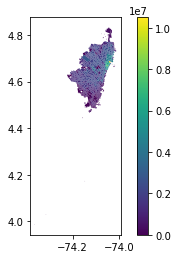

In [21]:
# Mapa Cloropletico del valor del precio mediano
df_bog.plot(legend=True,column=df_bog.iloc[:,11])

<AxesSubplot:>

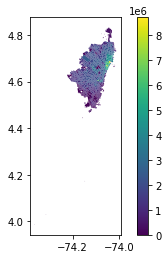

In [22]:
# Mapa Cloropletico del valor del precio medio
df_bog.plot(legend=True,column=df_bog.iloc[:,10])

Index([  'cartodb_id',    'scacodigo',      'scatipo',    'scanombre',
         'shape_leng',   'shape_area',  'MOVEMENT_ID', 'DISPLAY_NAME',
           'geometry',   'pos_scacod',    'vref_mean',  'vref_median'],
      dtype='object')

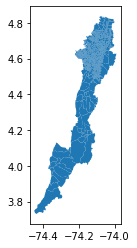

In [28]:
bog.plot()
df_bog.columns

In [32]:
#Se pierde la información para tantos barrios
df_bog.iloc[:,9].isna().sum()

126

In [40]:
df_bog.groupby("scatipo").count()

cartodb_id  scacodigo  scanombre  shape_leng  shape_area  \
scatipo                                                             
0               991        991        991         991         991   
1               119        119        119         119         119   
2                50         50         50          50          50   

         MOVEMENT_ID  DISPLAY_NAME  geometry  pos_scacod  vref_mean  \
scatipo                                                               
0                991           991       991           0          0   
1                119           119       119           0          0   
2                 50            50        50           0          0   

         vref_median  
scatipo               
0                  0  
1                  0  
2                  0

In [39]:
df_bog.loc[df_bog.iloc[:,9].isna(),:].groupby("scatipo").count()


cartodb_id  scacodigo  scanombre  shape_leng  shape_area  \
scatipo                                                             
0                 6          6          6           6           6   
1               119        119        119         119         119   
2                 1          1          1           1           1   

         MOVEMENT_ID  DISPLAY_NAME  geometry  pos_scacod  vref_mean  \
scatipo                                                               
0                  6             6         6           0          0   
1                119           119       119           0          0   
2                  1             1         1           0          0   

         vref_median  
scatipo               
0                  0  
1                  0  
2                  0

In [168]:
len(set(set(scacodigo)-set(metro_cuadrado_ref.pos_scacodigo)))
# Existen 126 barrios de bogotá para los cuales no habría información hipotetica dentro de los valores de metro cuadrado de referencia.


126

In [48]:
df_bog.loc[df_bog.iloc[:,9].isna(),:].loc[df_bog.iloc[:,2]==0,:]

cartodb_id scacodigo  scatipo                scanombre  shape_leng  \
304          745    008541        0                 TORCA II    0.026735   
542          213    008317        0               SAN ISIDRO    0.042676   
602          313    002628        0   EL BOSQUE SUR ORIENTAL    0.015620   
617          326    008218        0         INGEMAR ORIENTAL    0.043199   
938          815    008422        0        PARAMO URBANO III    0.017910   
1015         936    008316        0  SAN LUIS ALTOS DEL CABO    0.035803   

      shape_area MOVEMENT_ID                            DISPLAY_NAME  \
304     0.000031         305                  TORCA II, 008541 (305)   
542     0.000038         543                SAN ISIDRO, 008317 (543)   
602     0.000009         603    EL BOSQUE SUR ORIENTAL, 002628 (603)   
617     0.000044         618          INGEMAR ORIENTAL, 008218 (618)   
938     0.000007         939         PARAMO URBANO III, 008422 (939)   
1015    0.000051        1016  SAN LUIS ALTOS DEL CABO, 008316 (1016)   

                                               geometry pos_scacod  vref_mean  \
304   MULTIPOLYGON (((-74.02437 4.81344, -74.02433 4...        NaN        NaN   
542   MULTIPOLYGON (((-74.01843 4.66832, -74.01840 4...        NaN        NaN   
602   MULTIPOLYGON (((-74.08056 4.47125, -74.08057 4...        NaN        NaN   
617   MULTIPOLYGON (((-74.05338 4.63948, -74.05338 4...        NaN        NaN   
938   MULTIPOLYGON (((-74.01122 4.66369, -74.01122 4...        NaN        NaN   
1015  MULTIPOLYGON (((-74.02612 4.67089, -74.02580 4...        NaN        NaN   

      vref_median  
304           NaN  
542           NaN  
602           NaN  
617           NaN  
938           NaN  
1015          NaN

In [169]:
habi_train.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud', 'geometry'],
      dtype='object')

In [51]:
#Crear shape files a los datos de Habi para poder plotearlos en el mapa de Bogotá.
df=gpd.GeoDataFrame(habi_train, geometry=gpd.points_from_xy(habi_train.longitud, habi_train.latitud))

In [52]:
df.geometry

0         POINT (-74.09489 4.56096)
1         POINT (-74.10008 4.57696)
2         POINT (-74.10100 4.57500)
3         POINT (-74.10804 4.57592)
4         POINT (-74.09700 4.55900)
                    ...            
244483    POINT (-74.03828 4.73739)
244484    POINT (-74.03852 4.73424)
244485    POINT (-74.04066 4.73639)
244486    POINT (-74.04029 4.73752)
244487    POINT (-74.05847 4.70265)
Name: geometry, Length: 244488, dtype: geometry

In [53]:
# En esta parte join espacial
tot_df=gpd.sjoin(df,df_bog,how="left",op="intersects")

<ipython-input-53-17bc3e2d5732>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  tot_df=gpd.sjoin(df,df_bog,how="left",op="intersects")


In [54]:
tot_df.head()

id   area  ascensor  balcon  banos  banoservicio  conjuntocerrado  \
0  1205404   55.0       NaN     NaN    NaN           NaN                0   
1  1204371   43.0       NaN     NaN    NaN           NaN                0   
2  1125353  360.0       NaN     NaN    NaN           NaN                0   
3  1125506   60.0       NaN     NaN    NaN           1.0                0   
4  1204569   72.0       NaN     NaN    NaN           NaN                0   

   cuartoservicio  deposito  estrato  ...  scacodigo  scatipo  \
0             NaN       1.0      3.0  ...     001304      0.0   
1             NaN       0.0      NaN  ...     001401      0.0   
2             NaN       0.0      3.0  ...     001401      0.0   
3             1.0       0.0      3.0  ...     001402      0.0   
4             NaN       0.0      2.0  ...     001408      0.0   

            scanombre  shape_leng  shape_area  MOVEMENT_ID  \
0     BELLO HORIZONTE    0.024680    0.000030          519   
1        SAN JOSE SUR    0.025089    0.000034          274   
2        SAN JOSE SUR    0.025089    0.000034          274   
3    GUSTAVO RESTREPO    0.034550    0.000042          579   
4  VILLA DE LOS ALPES    0.015583    0.000014          513   

                       DISPLAY_NAME  pos_scacod     vref_mean  vref_median  
0     BELLO HORIZONTE, 001304 (519)      001304  1.035883e+06    1050000.0  
1        SAN JOSE SUR, 001401 (274)      001401  1.544937e+06    1600000.0  
2        SAN JOSE SUR, 001401 (274)      001401  1.544937e+06    1600000.0  
3    GUSTAVO RESTREPO, 001402 (579)      001402  1.491657e+06    1600000.0  
4  VILLA DE LOS ALPES, 001408 (513)      001408  1.651566e+06    1800000.0  

[5 rows x 45 columns]

In [55]:
len(tot_df.id.unique())

244488

In [56]:
tot_df.shape

(244488, 45)

In [57]:
tot_df.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud', 'geometry', 'index_right',
       'cartodb_id', 'scacodigo', 'scatipo', 'scanombre', 'shape_leng',
       'shape_area', 'MOVEMENT_ID', 'DISPLAY_NAME', 'pos_scacod', 'vref_mean',
       'vref_median'],
      dtype='object')

In [58]:
tot_df.describe().iloc[:,:]

id          area  ascensor   balcon          banos  \
count  2.444880e+05  2.441100e+05   87672.0  60181.0  243049.000000   
mean   6.017399e+05  1.654388e+04       1.0      1.0       2.795025   
std    4.054039e+05  6.307177e+06       0.0      0.0       1.662945   
min    6.000000e+00  0.000000e+00       1.0      1.0       0.000000   
25%    2.831318e+05  6.900000e+01       1.0      1.0       2.000000   
50%    5.290635e+05  1.050000e+02       1.0      1.0       3.000000   
75%    9.057762e+05  1.840000e+02       1.0      1.0       4.000000   
max    6.262945e+06  3.003515e+09       1.0      1.0     253.000000   

       banoservicio  conjuntocerrado  cuartoservicio       deposito  \
count       12231.0    244488.000000         55492.0  107413.000000   
mean            1.0         0.319202             1.0       0.873339   
std             0.0         0.466168             0.0       0.332594   
min             1.0         0.000000             1.0       0.000000   
25%             1.0         0.000000             1.0       1.000000   
50%             1.0         0.000000             1.0       1.000000   
75%             1.0         1.000000             1.0       1.000000   
max             1.0         1.000000             1.0       1.000000   

             estrato  ...    valorventa        latitud       longitud  \
count  236806.000000  ...  2.444880e+05  244488.000000  244488.000000   
mean        4.402790  ...  9.750223e+09       4.686655     -74.072314   
std         1.322203  ...  2.464129e+12       0.049003       0.038236   
min         0.000000  ...  5.300000e+07       3.890660     -74.362167   
25%         3.000000  ...  3.000000e+08       4.657976     -74.090172   
50%         4.000000  ...  5.004635e+08       4.694997     -74.058998   
75%         6.000000  ...  9.000000e+08       4.720133     -74.045471   
max         7.000000  ...  1.000000e+15       4.834706     -73.990173   

         index_right     cartodb_id        scatipo     shape_leng  \
count  244462.000000  244462.000000  244462.000000  244462.000000   
mean      617.686581     584.293440       0.013761       0.036361   
std       314.174563     354.491401       0.131817       0.020911   
min         0.000000       1.000000       0.000000       0.004171   
25%       361.000000     238.000000       0.000000       0.027408   
50%       620.000000     629.000000       0.000000       0.033039   
75%       896.000000     868.000000       0.000000       0.039491   
max      1159.000000    1160.000000       2.000000       0.437596   

         shape_area     vref_mean   vref_median  
count  2.444620e+05  2.418330e+05  2.418330e+05  
mean   6.100485e-05  2.928690e+06  3.033916e+06  
std    7.739095e-05  1.476754e+06  1.546578e+06  
min    7.972500e-07  0.000000e+00  0.000000e+00  
25%    3.320386e-05  1.961944e+06  2.000000e+06  
50%    4.920190e-05  2.480496e+06  2.520000e+06  
75%    7.218937e-05  4.248229e+06  4.390000e+06  
max    8.301847e-03  8.727885e+06  1.050000e+07  

[8 rows x 35 columns]

In [61]:
# (Deber) Eliminar los que tengan más de 253 baños
tot_df[tot_df.banos==253].iloc[:,0:28]

id   area  ascensor  balcon  banos  banoservicio  \
101355   696837  240.0       NaN     1.0  253.0           NaN   
101356  1000233  115.0       1.0     NaN  253.0           NaN   

        conjuntocerrado  cuartoservicio  deposito  estrato  ...  porteria  \
101355                0             NaN       1.0      4.0  ...       NaN   
101356                0             NaN       1.0      6.0  ...       NaN   

        remodelado  saloncomunal  terraza  tiempodeconstruido  vigilancia  \
101355         NaN           1.0      1.0      Más de 30 años         NaN   
101356         NaN           1.0      NaN         9 a 15 años         NaN   

           vista  zonalavanderia  valoradministracion    valorventa  
101355       NaN             NaN                  0.0  1.250000e+09  
101356  Interior             NaN             580000.0  8.900000e+08  

[2 rows x 28 columns]

In [64]:
tot_df['pr_area']=tot_df["valorventa"]/tot_df["area"]

In [65]:
#Numero de Casas que reportan tener un area de 0 metros cuadrados
sum(tot_df["area"]<=0)

504

In [66]:
tot_df=tot_df[tot_df["area"] != 0]

In [67]:
tot_df['pr_area'].describe()

count    2.436060e+05
mean     2.098124e+09
std      1.013104e+12
min      1.997660e-01
25%      3.595797e+06
50%      4.800000e+06
75%      6.310680e+06
max      5.000000e+14
Name: pr_area, dtype: float64

<AxesSubplot:>

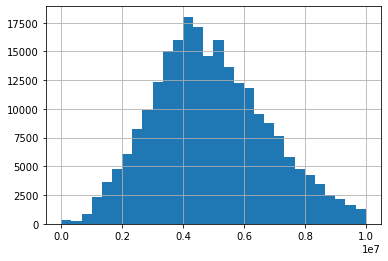

In [71]:
tot_df['pr_area'][tot_df['pr_area']<10000000].hist(bins=30)

In [72]:
tot_df["diff_pr_area"]=tot_df.loc[:,'pr_area']-tot_df.loc[:,'vref_mean']

C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [73]:
tot_df['diff_pr_area'].describe()

count    2.409660e+05
mean     2.118087e+09
std      1.018638e+12
min     -6.938268e+06
25%      1.071134e+06
50%      1.955770e+06
75%      3.038251e+06
max      5.000000e+14
Name: diff_pr_area, dtype: float64

<AxesSubplot:>

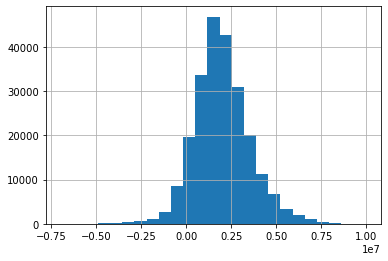

In [232]:
tot_df['diff_pr_area'][tot_df['pr_area']<10000000].hist(bins=25)

## Join con los mapas de vref de metro cuadrado y mapa catastral de bogotá



In [76]:
import sys
import os
os.chdir('C:\\Users\\carli\\Dropbox\\Carlos Arturo Ramírez Pinto\\Files\\Universidad\\Kaggle\\El Algoritmo es Correcto')
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

print("Cargando bases de datos de valores de referencia mt2")
#Cargar geojson de metro cuadrado de referencia
metro_cuadrado_ref=gpd.read_file("mapas_bogota\\metrocuadrado_ref.geojson")
# valores de referencia que pertenecen a los años más recientes, mayores a 2018
metro_cuadrado_ref["ano_rec"]=metro_cuadrado_ref["ANO"].apply(lambda x: x in lista_ano)
metro_cuadrado_ref=metro_cuadrado_ref[metro_cuadrado_ref["ano_rec"]==True]


#Creamos el posible scacodigo (codigo de barrios) suponiendo que los 6 primeros digitos corresponden al valor del codigo del barrio

metro_cuadrado_ref["pos_scacodigo"]=metro_cuadrado_ref.MANCODIGO.str.slice(0,6)
print("Numero de barrios: ",len(metro_cuadrado_ref.pos_scacodigo.unique()))
print("Terminado")


print("Cargando bases de datos de Colegios, Catastro, y datos de habi")
#Cargamos el mapa catastral de Bogotá. Colegios, Habi
col=gpd.read_file('mapas_bogota\\colegios.json')
bog=gpd.read_file("mapas_bogota\\bogota_catastral.json")
habi_train=pd.read_csv("datos_habi\\train_data.csv")
print("Terminado")

print("Creando geometrias de Habi")
#Crear shape files a los datos de Habi para poder plotearlos en el mapa de Bogotá.
df=gpd.GeoDataFrame(habi_train, geometry=gpd.points_from_xy(habi_train.longitud, habi_train.latitud))




Numero de barrios:  1053


In [121]:
result_df=metro_cuadrado_ref.groupby("MANCODIGO").agg({'V_REF':['mean','median'],'geometry':'unique'})
result_df.reset_index(level=0,inplace=True)
result_df.iloc[:,3]=result_df.iloc[:,3].apply(lambda x: x[0])
result_df.columns.values[3]="geometry"


In [113]:
result_df=gpd.GeoDataFrame(result_df, geometry=result_df.iloc[:,3])

Index(['', 'mean', 'median', 'unique'], dtype='object')

In [134]:
def crear_geodf(barrio,metro_cuadrado_ref,bog):
    if barrio==1:
        agg_v_ref_scacod=metro_cuadrado_ref.groupby("pos_scacodigo").agg({'V_REF':['mean','median']})
        agg_v_ref_scacod.reset_index(level=0,inplace=True)
        # Merge entre los valores medios de referencia por barrio y el mapa catastral de bogotá
        result_df=bog.merge(agg_v_ref_scacod,left_on="scacodigo",right_on="pos_scacodigo",how="left")
    elif barrio==0:
        result_df=metro_cuadrado_ref.groupby("MANCODIGO").agg({'V_REF':['mean','median'],'geometry':'unique'})
        result_df.reset_index(level=0,inplace=True)
        result_df.iloc[:,3]=result_df.iloc[:,3].apply(lambda x: x[0])
        result_df.columns.droplevel()
        result_df.columns.values[3]="geometry"
        result_df=gpd.GeoDataFrame(result_df, geometry=result_df.iloc[:,3])
    result_df.columns.values[0]="geo_unit"
    result_df.columns.values[1]="vref_mean"
    result_df.columns.values[2]="vref_median"
    
    return result_df

In [135]:
barrio=0
geo_df=crear_geodf(barrio,metro_cuadrado_ref,bog)
# En esta parte join espacial
if barrio==0:
    geo_df.columns=pd.Index(["geo_unit","vref_mean","vref_median","geometry"])
tot_df=gpd.sjoin(df,geo_df,how="left",op="intersects")

In [143]:
geo_df.columns

Index(['geo_unit', 'vref_mean', 'vref_median', 'geometry'], dtype='object')

In [145]:
tot_df.head()

id   area  ascensor  balcon  banos  banoservicio  conjuntocerrado  \
0  1205404   55.0       NaN     NaN    NaN           NaN                0   
1  1204371   43.0       NaN     NaN    NaN           NaN                0   
2  1125353  360.0       NaN     NaN    NaN           NaN                0   
3  1125506   60.0       NaN     NaN    NaN           1.0                0   
4  1204569   72.0       NaN     NaN    NaN           NaN                0   

   cuartoservicio  deposito  estrato  ...    valorventa  tipoinmueble  \
0             NaN       1.0      3.0  ...  1.699500e+08          Casa   
1             NaN       0.0      NaN  ...  9.000000e+07          Casa   
2             NaN       0.0      3.0  ...  1.100000e+09          Casa   
3             1.0       0.0      3.0  ...  2.600000e+08   Apartamento   
4             NaN       0.0      2.0  ...  1.250000e+08          Casa   

   tiponegocio   latitud   longitud                   geometry  index_right  \
0        Venta  4.560965 -74.094889  POINT (-74.09489 4.56096)          NaN   
1        Venta  4.576960 -74.100083  POINT (-74.10008 4.57696)       3242.0   
2        Venta  4.575000 -74.101000  POINT (-74.10100 4.57500)       3250.0   
3        Venta  4.575924 -74.108039  POINT (-74.10804 4.57592)       3279.0   
4        Venta  4.559000 -74.097000  POINT (-74.09700 4.55900)       3606.0   

    geo_unit     vref_mean  vref_median  
0        NaN           NaN          NaN  
1  001401036  1.600000e+06    1600000.0  
2  001401044  1.683333e+06    1700000.0  
3  001402015  1.600000e+06    1600000.0  
4  001408054  6.850000e+05     690000.0  

[5 rows x 37 columns]

# 1. La Base de datos objetivo: 

Unidad de observación fuese cada punto de los datos de Habi:
 - crear dummies a partir de las variables categoricas
 - Ubicar esos puntos en barrios o unidades de referencia.
 
## Procesamiento Mapas de valor de referencia

Resumir el precio del metro de cuadrado de referencia por alguna unidad espacial:

   - Resumen por manzana!!!! hay 44000 manzanas en Bogotá 
   - Resumen por localidad
    
## Juntar las dos bases de datos:

# Tareas

- Cuando 1) este listo. Hacer un test con algun algoritmo medianamente sencillo.

- Cuando

NameError: name 'df' is not defined

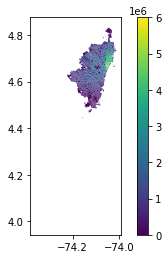

In [21]:
bog.shape

(1160, 9)

<AxesSubplot:>

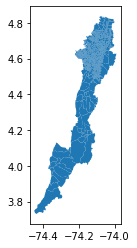

In [22]:
bog.plot()

In [20]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

<AxesSubplot:>

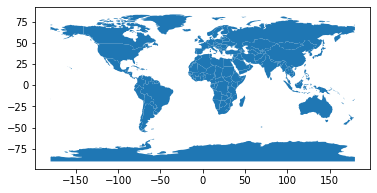

In [24]:
world.plot()

In [17]:
col.columns

Index(['OBJECTID', 'DANE12_EST', 'NOMBRE_EST', 'NIT___DIST', 'DANE12_SED',
       'NOMBRE_SED', 'ORDEN_DE_S', 'ZONA', 'DIRECCION', 'BARRIO__GE',
       'TELEFONO', 'EMAIL', 'WEB', 'CODIGO_POS', 'ENFASIS_PA', 'DISCAPACID',
       'TALENTOS_O', 'GRUPOS_ETN', 'REGIMEN_Y', 'CPF', 'NOMBRE_UPZ',
       'SECTOR_CEN', 'COD_UPZ', 'ESTRATO', 'NATU_JUR', 'SECTOR', 'ESTADO',
       'CALENDARIO', 'BILINGUE', 'GENERO', 'CARACTER_P', 'ESPECIALID',
       'CLASE_TIPO', 'FECHA', 'COD_LOCA', 'geometry'],
      dtype='object')

In [28]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [27]:
world.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [10]:
a=set([1,2,3])
b=set([3,4,6])
c=a -b
c

{1, 2}

In [ ]:
    lista_que_si_sirven = [i for i in range(0,len(col))]
    lista_que_si_sirven = list( set(lista_que_si_sirven) - set(lista_colegios_no_sirven))

In [17]:
len(lista_que_si_sirven)

445

In [15]:
len(lista_colegios_no_sirven)

2095

C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:364: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geop

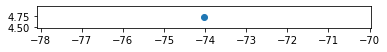

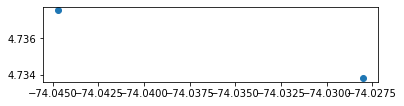

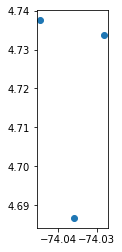

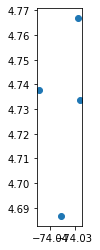

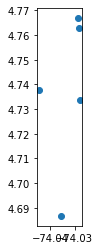

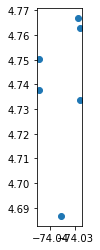

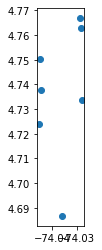

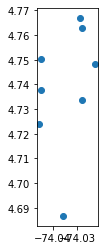

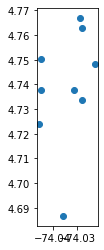

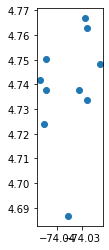

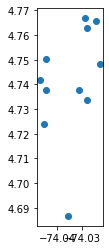

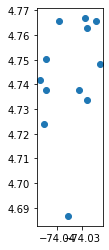

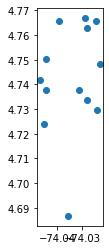

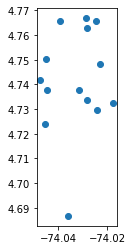

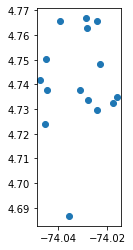

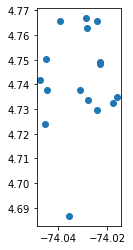

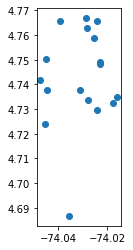

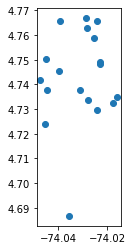

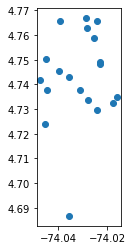

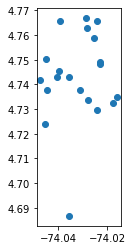

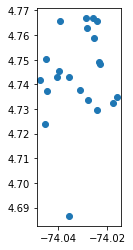

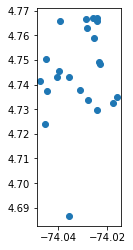

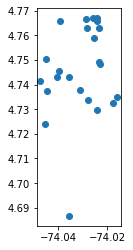

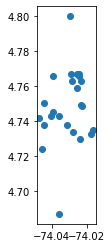

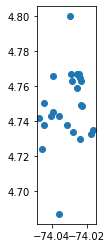

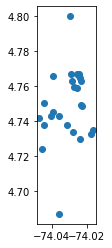

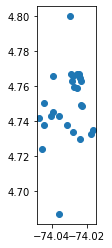

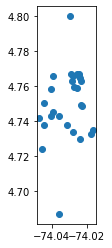

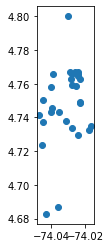

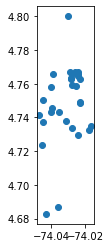

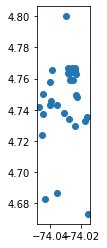

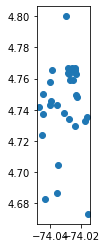

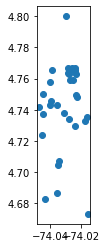

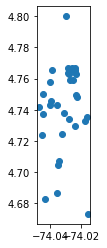

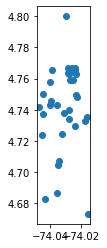

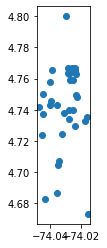

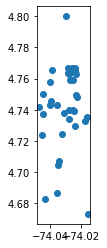

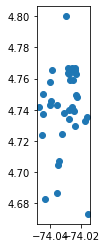

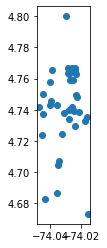

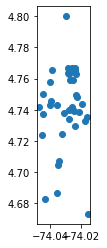

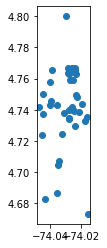

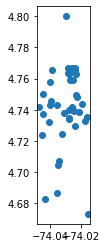

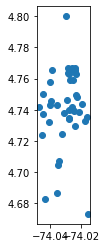

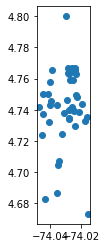

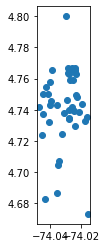

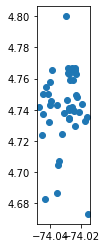

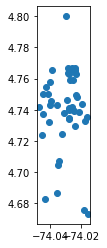

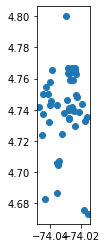

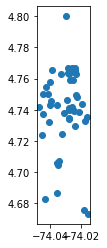

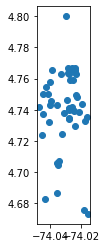

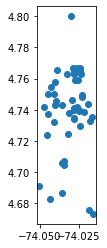

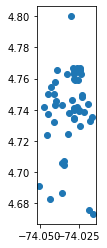

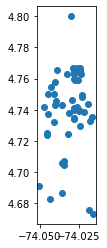

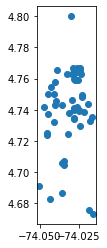

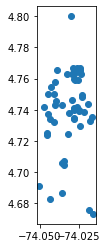

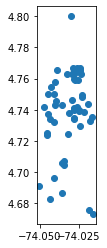

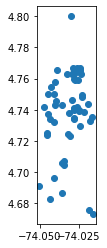

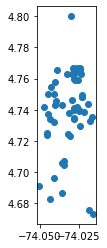

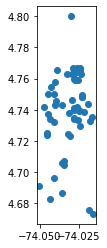

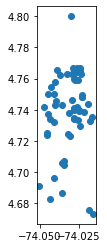

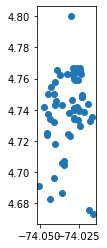

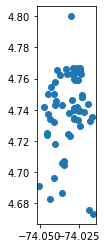

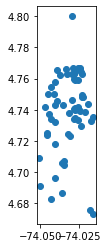

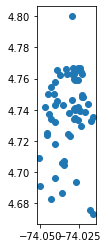

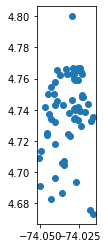

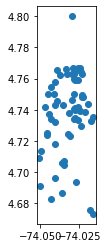

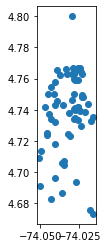

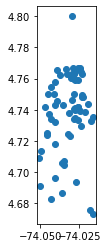

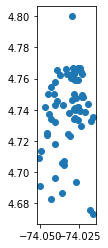

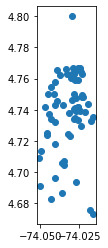

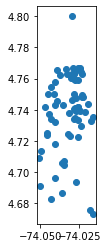

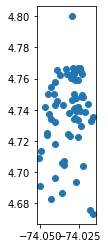

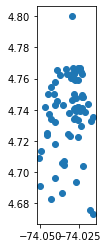

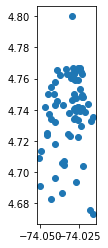

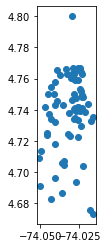

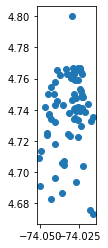

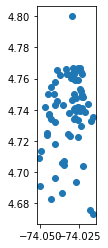

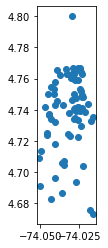

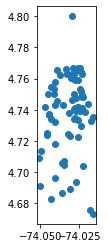

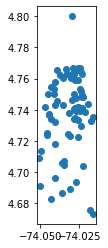

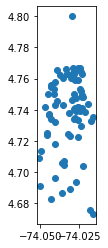

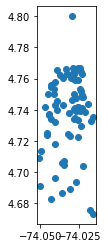

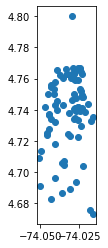

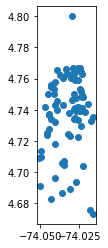

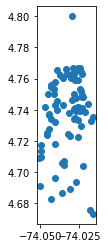

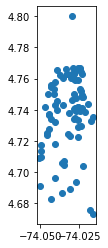

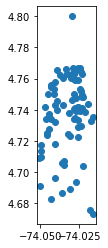

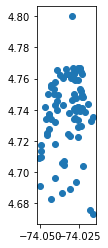

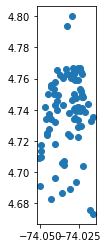

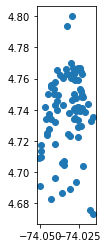

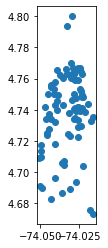

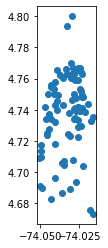

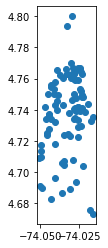

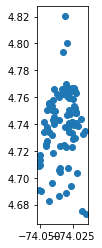

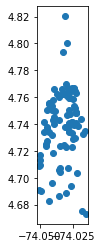

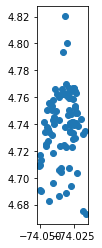

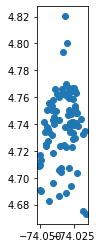

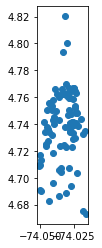

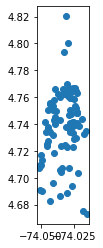

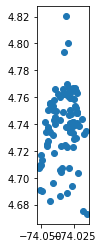

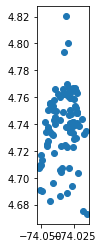

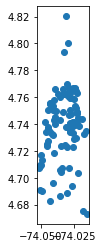

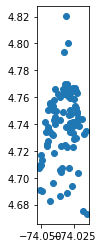

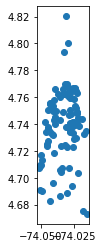

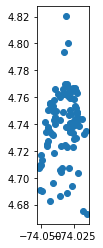

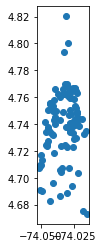

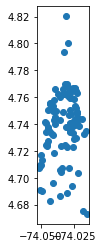

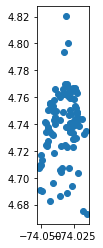

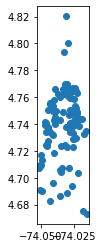

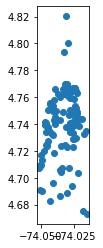

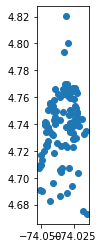

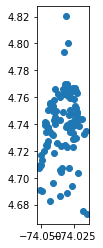

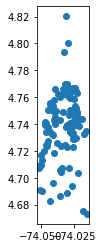

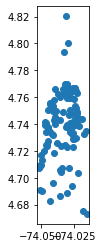

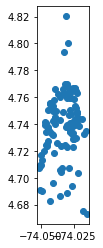

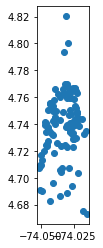

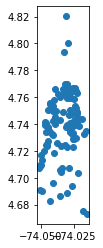

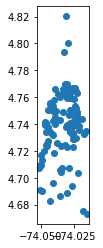

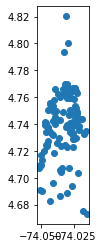

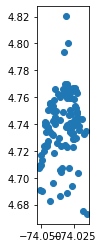

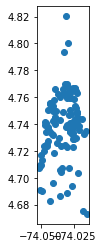

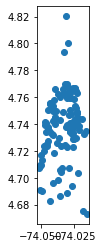

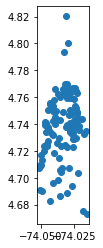

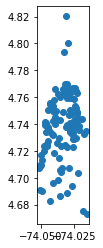

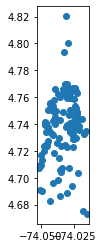

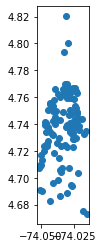

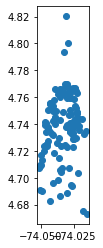

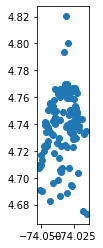

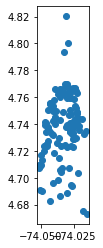

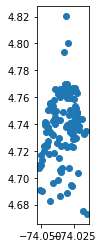

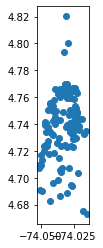

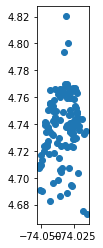

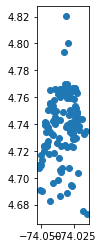

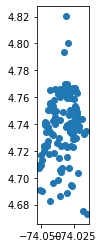

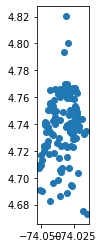

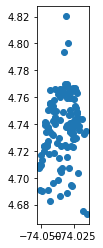

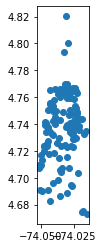

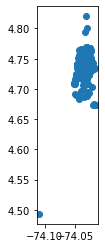

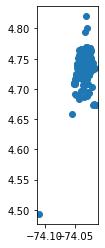

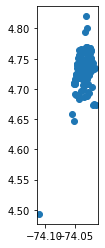

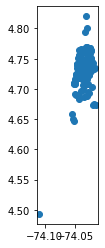

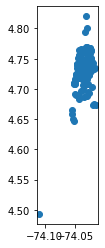

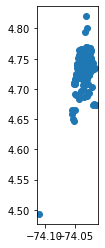

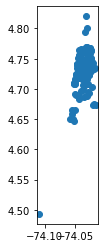

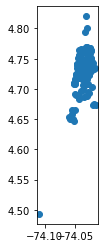

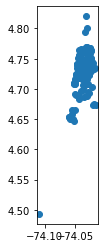

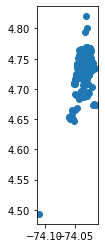

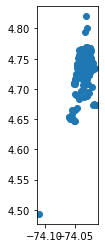

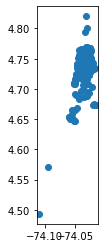

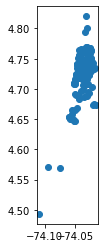

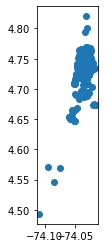

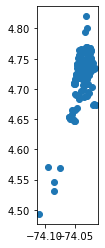

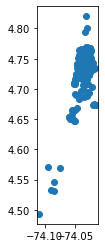

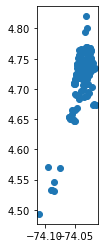

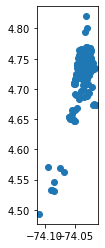

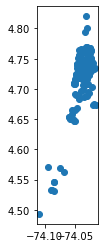

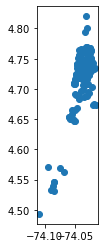

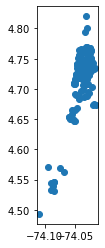

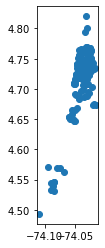

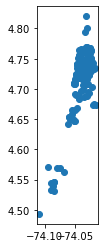

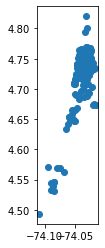

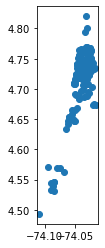

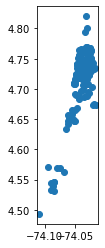

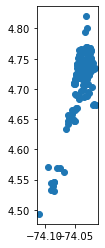

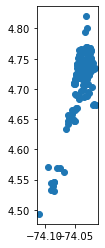

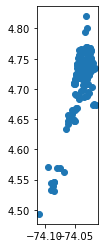

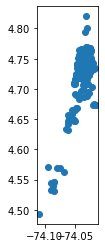

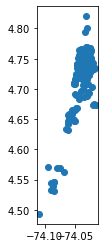

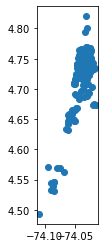

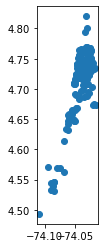

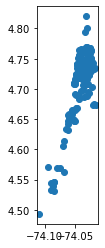

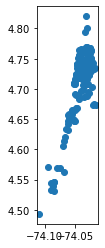

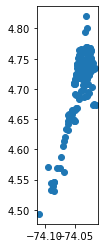

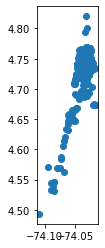

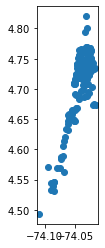

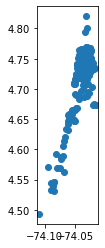

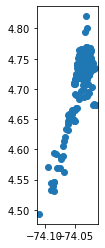

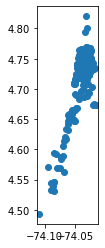

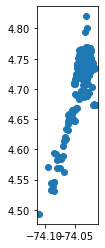

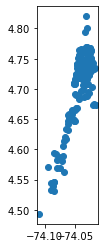

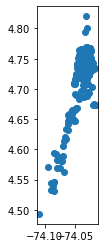

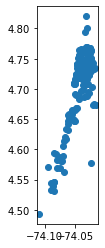

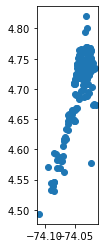

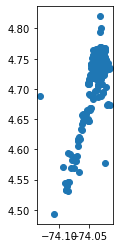

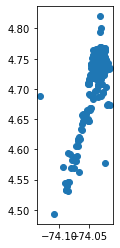

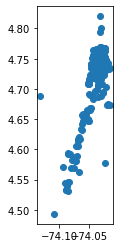

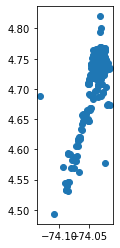

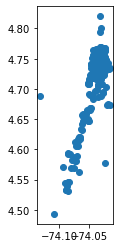

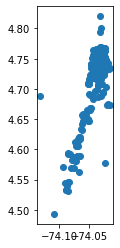

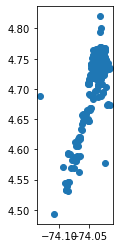

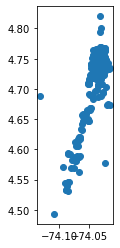

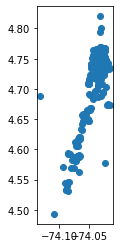

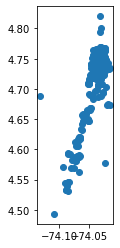

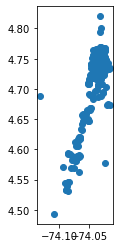

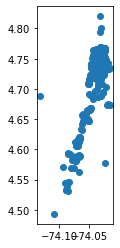

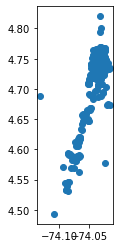

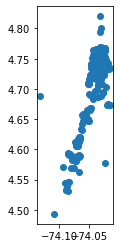

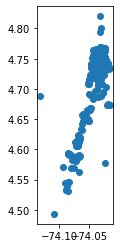

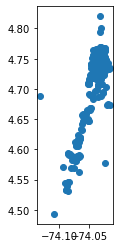

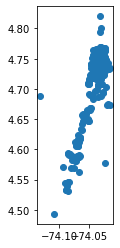

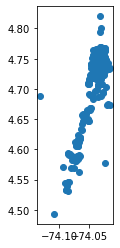

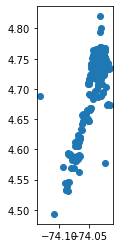

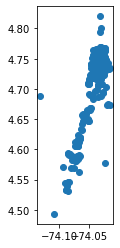

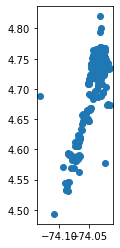

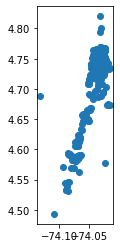

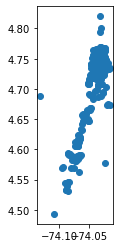

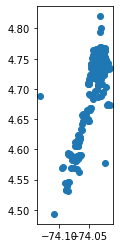

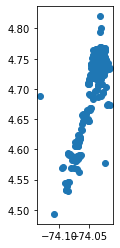

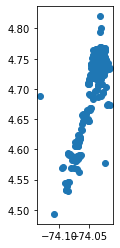

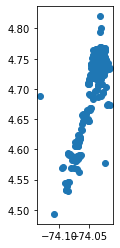

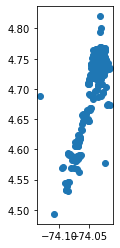

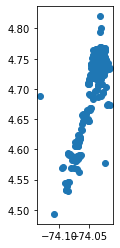

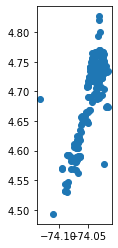

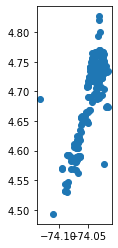

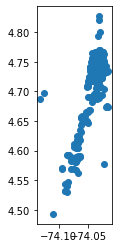

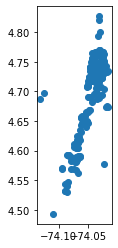

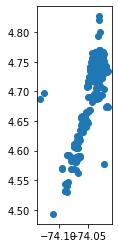

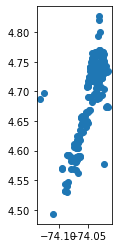

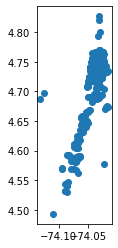

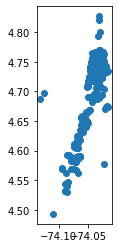

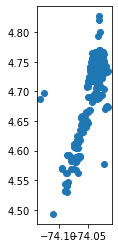

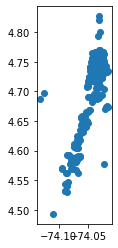

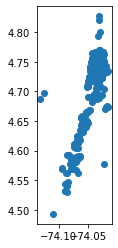

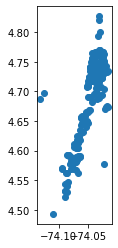

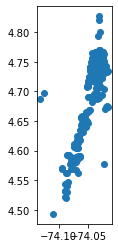

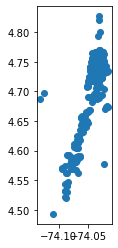

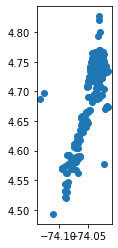

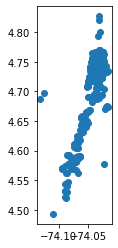

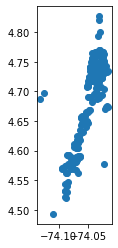

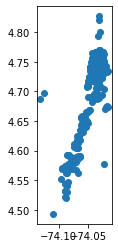

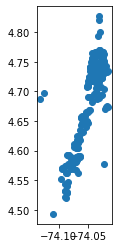

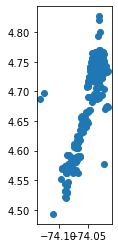

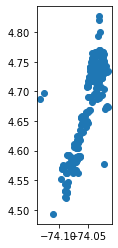

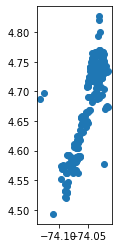

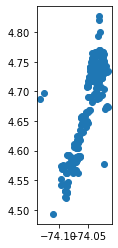

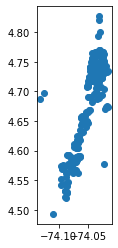

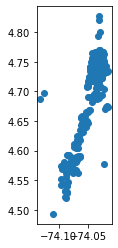

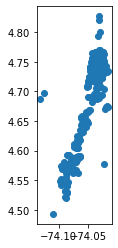

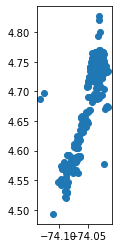

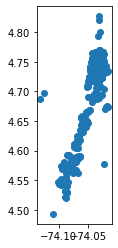

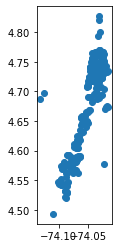

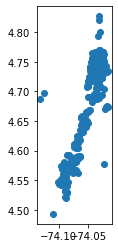

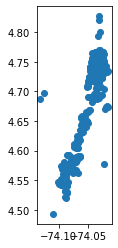

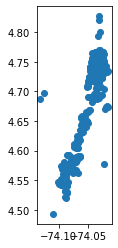

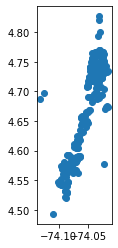

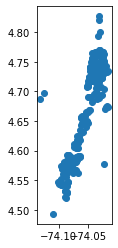

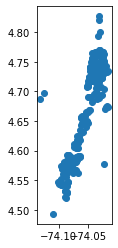

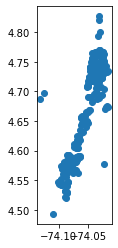

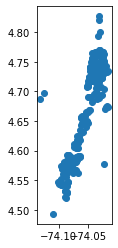

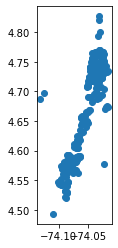

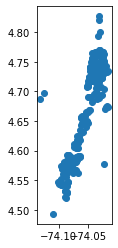

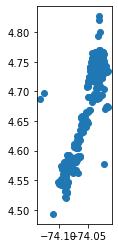

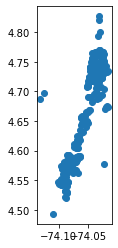

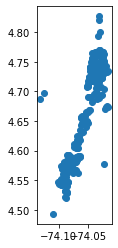

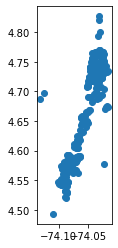

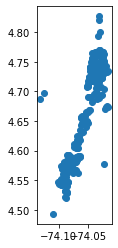

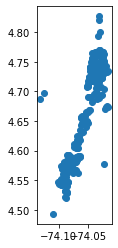

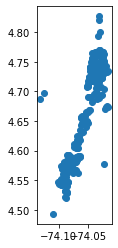

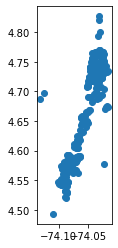

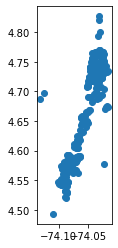

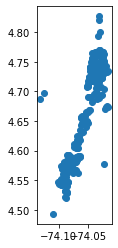

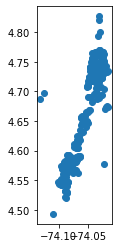

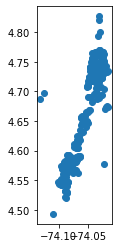

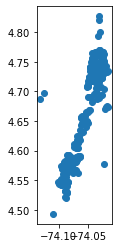

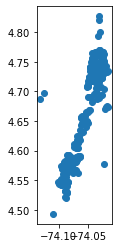

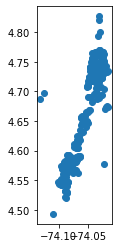

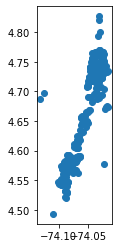

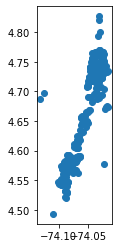

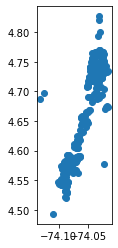

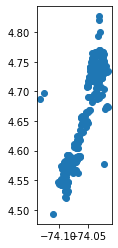

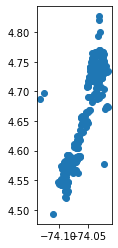

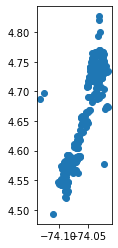

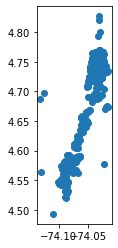

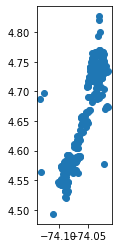

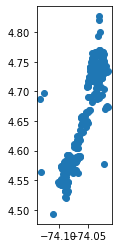

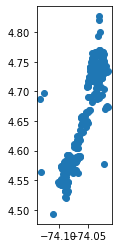

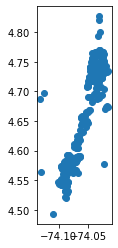

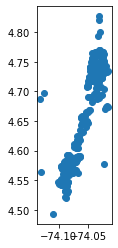

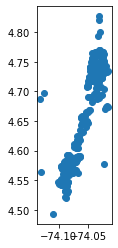

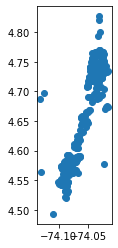

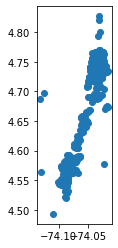

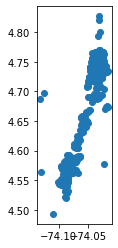

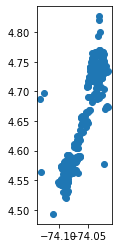

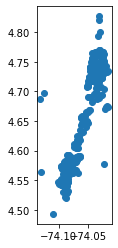

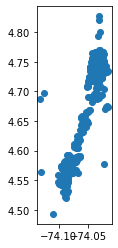

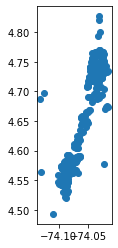

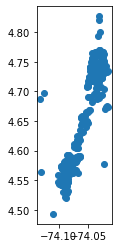

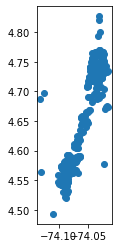

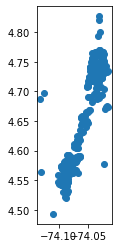

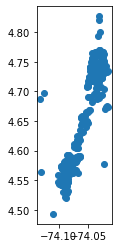

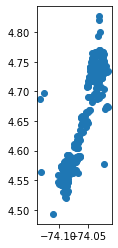

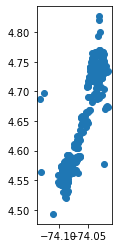

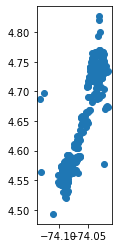

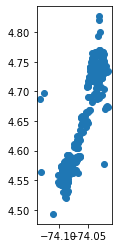

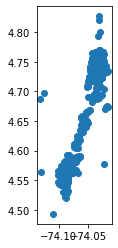

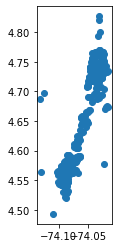

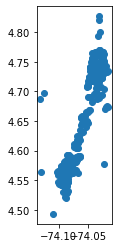

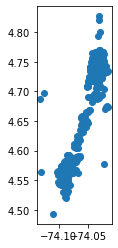

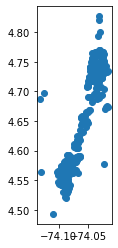

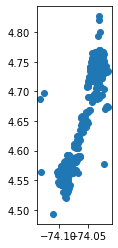

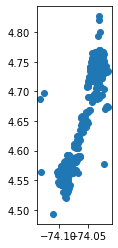

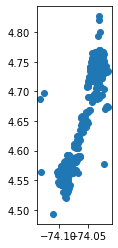

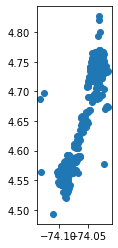

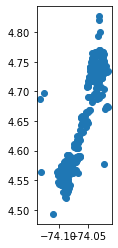

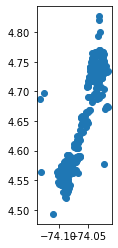

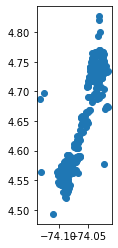

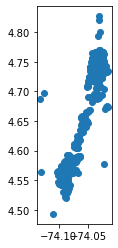

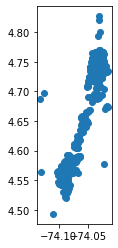

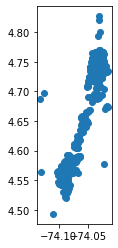

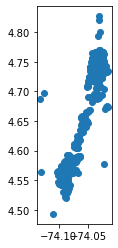

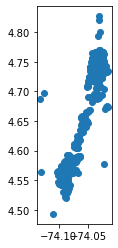

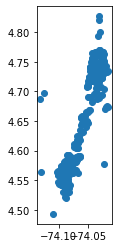

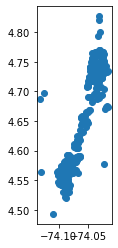

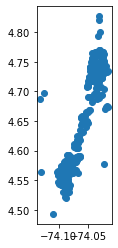

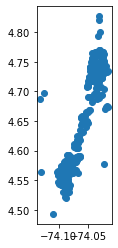

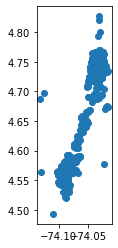

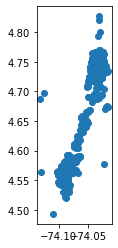

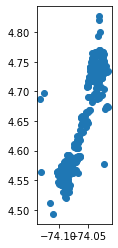

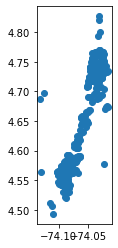

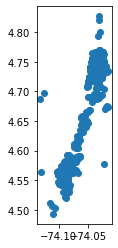

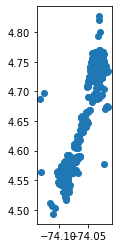

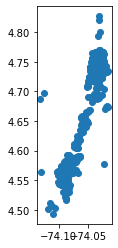

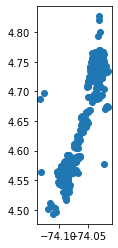

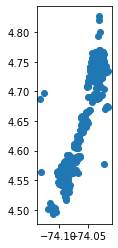

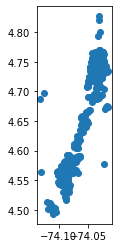

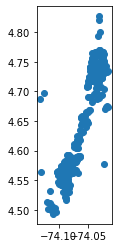

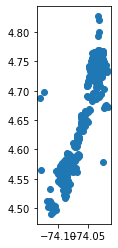

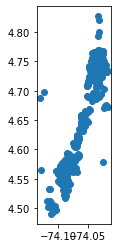

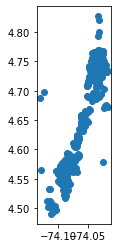

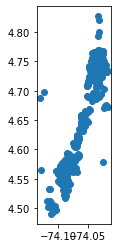

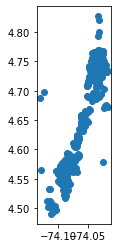

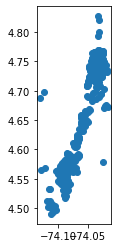

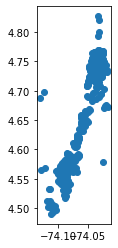

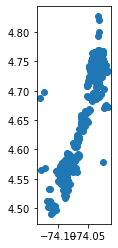

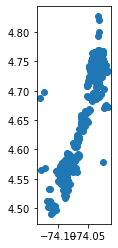

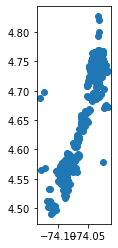

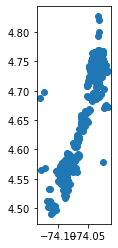

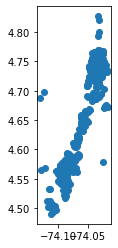

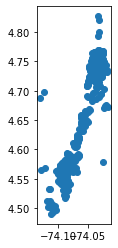

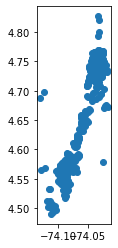

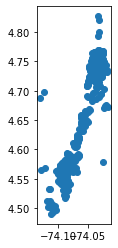

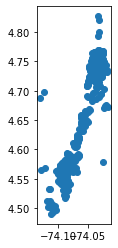

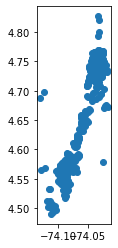

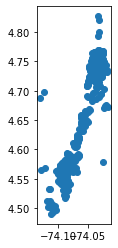

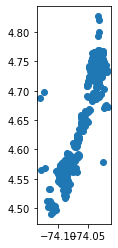

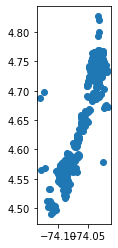

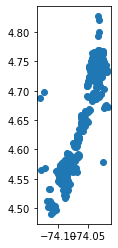

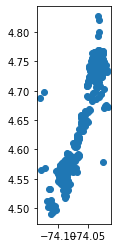

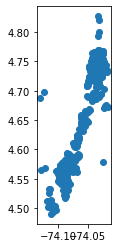

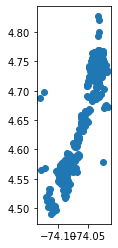

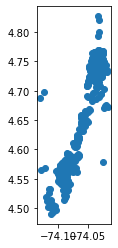

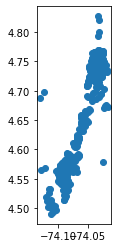

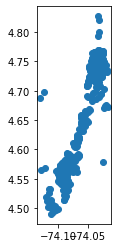

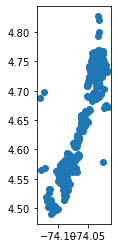

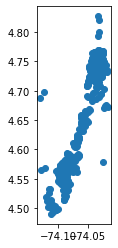

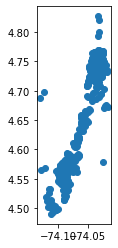

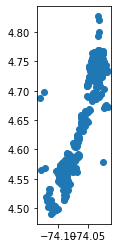

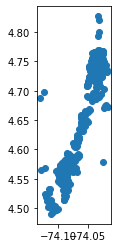

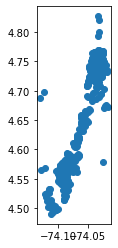

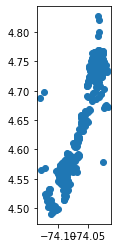

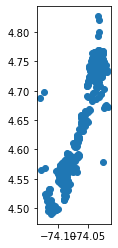

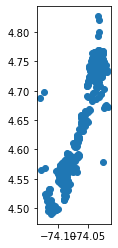

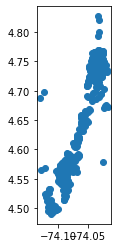

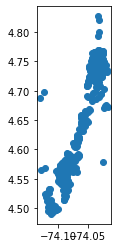

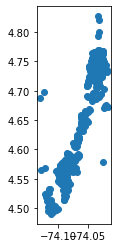

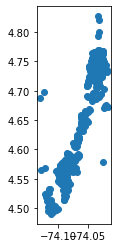

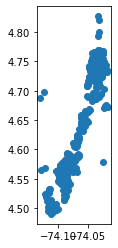

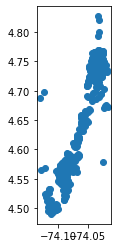

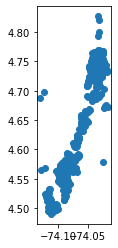

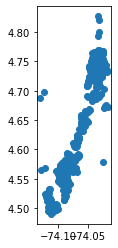

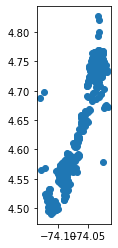

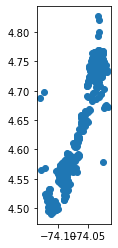

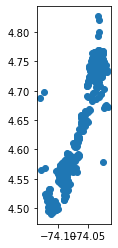

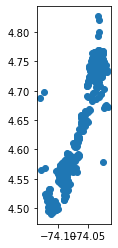

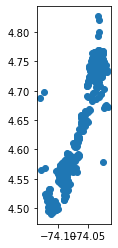

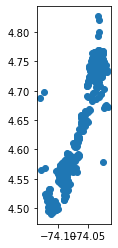

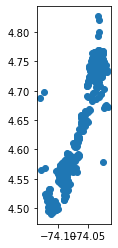

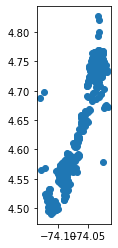

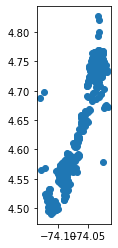

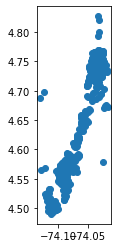

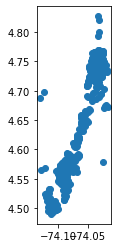

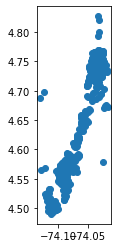

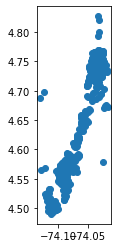

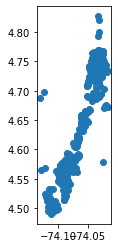

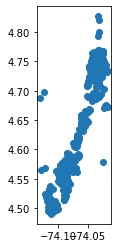

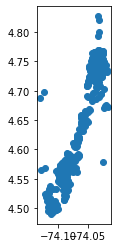

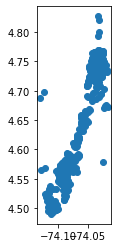

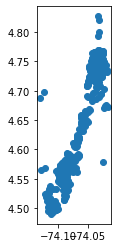

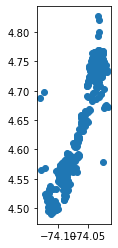

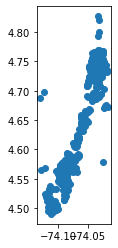

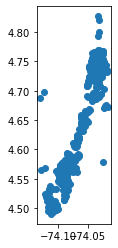

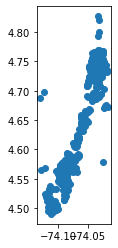

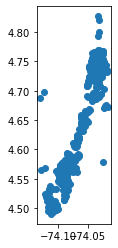

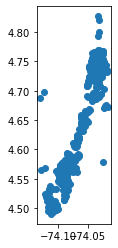

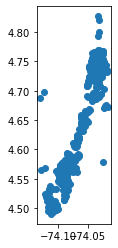

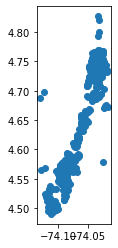

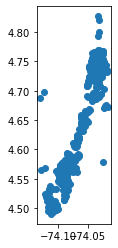

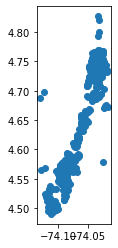

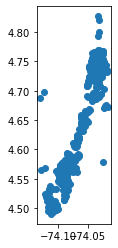

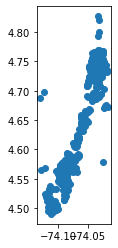

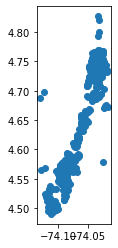

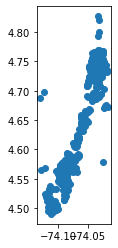

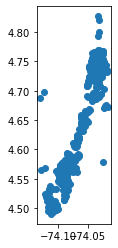

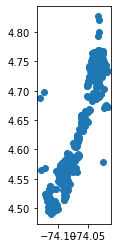

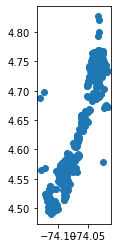

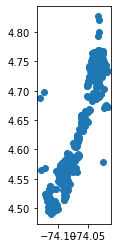

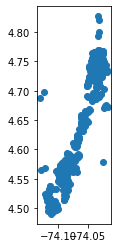

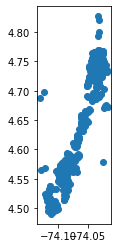

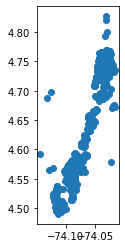

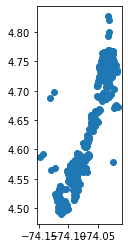

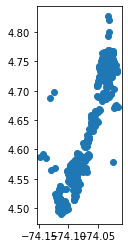

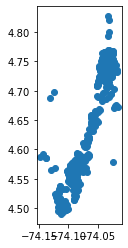

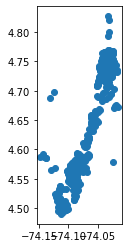

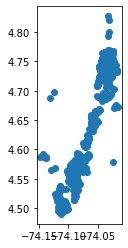

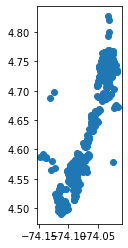

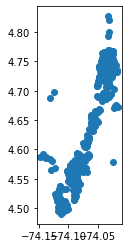

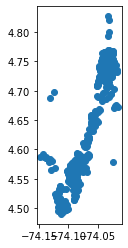

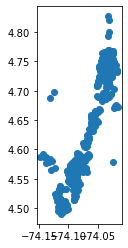

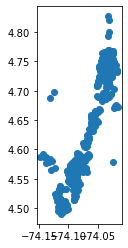

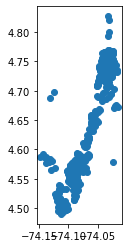

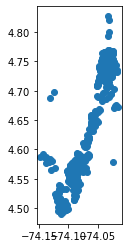

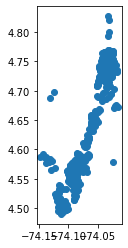

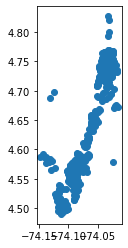

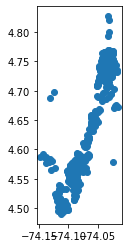

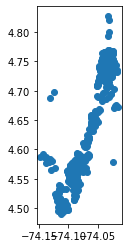

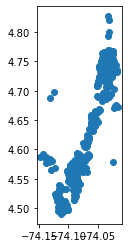

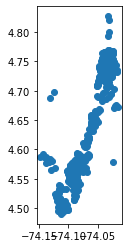

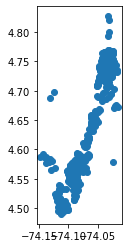

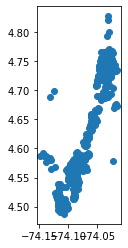

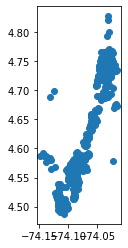

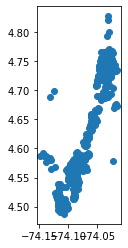

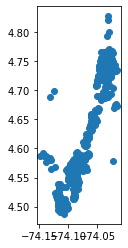

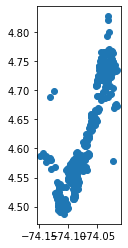

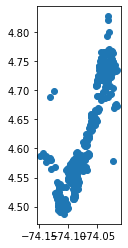

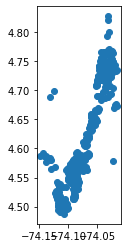

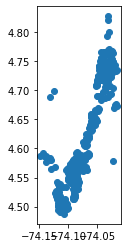

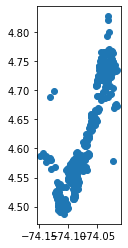

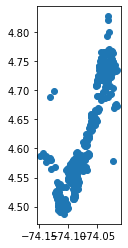

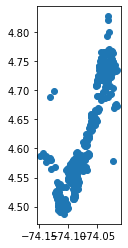

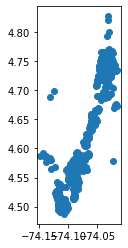

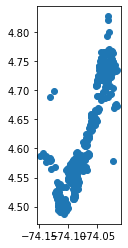

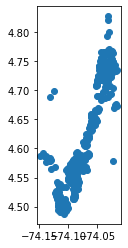

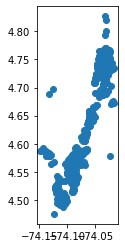

ValueError: cannot convert float NaN to integer

In [12]:
lista_colegios_no_sirven=[]
for i in range(1,len(col)):
    
    temp_col=col.iloc[0:i,:]
    lista_que_si_sirven = [i for i in range(0,len(col))]
    lista_que_si_sirven = list( set(lista_que_si_sirven) - set(lista_colegios_no_sirven))
    try:
        temp_col.plot()
    except:
        lista_colegios_no_sirven.append(i)
    


In [87]:
col2=col.iloc[1:443,:]
# El colegio 444 esta dando problemas
lista=[i!=444 for i in range(0,len(col))]
col3=col.iloc[lista,:]


C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:364: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:364: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\matplotlib\axes\_base.py:2566: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

In [ ]:
col3.plot()

In [70]:
problema=col.iloc[440:450,:]
problema.head()

OBJECTID    DANE12_EST                                        NOMBRE_EST  \
440       466  1.110010e+11  COLEGIO CENTRO INTEGRAL JOSE MARIA CORDOBA (IED)   
441       467  1.110010e+11  COLEGIO CENTRO INTEGRAL JOSE MARIA CORDOBA (IED)   
442       384  1.110018e+11                COLEGIO JOSE EUSTASIO RIVERA (IED)   
443       385  1.110018e+11                      COLEGIO CIUDAD CHENGDU (IED)   
444       386  1.118500e+11       COLEGIO FRANCISCO ANTONIO ZEA DE USME (IED)   

       NIT___DIST    DANE12_SED                           NOMBRE_SED  \
440  8.001330e+09  1.110010e+11                   JOSE MARIA CORDOBA   
441  8.001330e+09  1.110010e+11                   SANTA FE DE BOGOTA   
442  8.999991e+09  1.110018e+11  COLEGIO JOSE EUSTASIIO RIVERA (IED)   
443  8.999991e+09  1.110018e+11         COLEGIO CIUDAD CHENGDU (IED)   
444  8.605325e+09  1.118500e+11                                 USME   

    ORDEN_DE_S    ZONA                                          DIRECCION  \
440          A  URBANA                            DG 48 B SUR # 24 B - 73   
441          B  URBANA                              KR 24 D # 49 - 50 SUR   
442          A  URBANA                             KR 14 B # 136 - 22 SUR   
443          A  URBANA  KR 14 C # 74 A - 06 SUR  --  KR 12 G # 22 B - ...   
444          A  URBANA                              TV 2 A # 135 - 78 SUR   

                                   BARRIO__GE  ... ESTADO CALENDARIO BILINGUE  \
440                            TUNAL ORIENTAL  ...      1          1        4   
441                            TUNAL ORIENTAL  ...      1          1        4   
442    CIUDADELA DE USME LA ESPERANZA I ETAPA  ...      2          1        4   
443  SAN JUAN BAUTISTA  --  S.C. SAN JOSE SUR  ...      2          1        4   
444                               CENTRO USME  ...      1          1        4   

     GENERO CARACTER_P ESPECIALID CLASE_TIPO       FECHA COD_LOCA  \
440       5          1          1          1  2020-06-30       06   
441       5          1          1          1  2020-06-30       06   
442       5          1          1          2  2020-06-30       05   
443       5          1          1          2  2020-06-30       05   
444       5          1          1          1  2020-06-30       05   

                                              geometry  
440                              POINT (-74.131 4.579)  
441                              POINT (-74.133 4.578)  
442                              POINT (-74.123 4.475)  
443  POINT (-17976931348623157081452742373170435679...  
444                              POINT (-74.121 4.474)  

[5 rows x 36 columns]

In [67]:
col2.plot()

C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:364: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:364: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\matplotlib\axes\_base.py:2566: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

In [33]:
col.plot('geometry')

C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: overflow encountered in double_scalars
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
C:\Users\carli\Anaconda3\envs\Habi\lib\site-packages\geopandas\plotting.py:595: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>